## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)  # features and labels for classification
boston_X, boston_y = datasets.load_boston(return_X_y=True)  # features and labels for regression

import warnings
warnings.simplefilter('ignore')

## Transformations

### Imputing values

#### Filling in missing values

Scikit-learn's `SimpleImputer` is a transformer for completing missing values.
One needs to set a placeholder for the missing values. The default is `np.nan`. All its occurrences of will be imputed. 

For this we can instantiate an imputer object, a type of transformer object, fit it to the data, and apply the transformation.

In [2]:
X = pd.DataFrame(np.arange(0, 12, 1).reshape(4, 3))
X.loc[0, 0] = X.loc[1, 1] = X.loc[2, 2]  = np.nan


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # instantiate imputer
imp.fit(X)  # fit the imputer on X
X = imp.transform(X)  # impute all missing values in X
print(X)


[[ 6.  1.  2.]
 [ 3.  6.  5.]
 [ 6.  7.  6.]
 [ 9. 10. 11.]]


### Scaling values

#### Standardization

The `StandardScaler` utility class standardizes features by simply subtracting their mean and scaling to unit variance. Scaled data has zero mean and unit variance. However, this transformation ignores other aspects of the distribution.

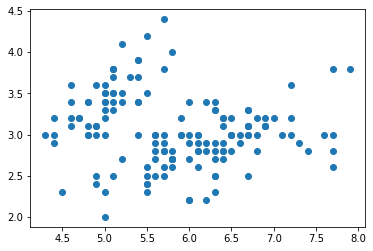

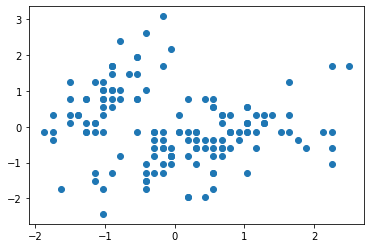

In [3]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(iris_X)  # transformation method
ax = plt.scatter(iris_X[:, 0], iris_X[:, 1])
plt.show()
plt.scatter(scaled_X[:, 0], scaled_X[:, 1])
plt.show()

The utility class `StandardScaler` implements the Transformer API to compute the mean and standard deviation on a training set so as to be <u>able to later re-apply the same transformation on the testing set</u>. This class is hence suitable for use in the early steps of a Pipeline.

In [4]:
from sklearn.datasets import make_classification  # generates random n-class classification set
from sklearn.pipeline import make_pipeline  # shorthand for Pipeline constructor that does not take names

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

#### Quantile normalization

A quantile transformer modifies features based on quantile information. It is based on the diea of **quantile normalization**, a technique for making two distributions identical in statistical properties. 

Scikit-Learn's `QuantileTransformer` transforms the features to follow a uniform or a normal distribution. All values will be between 0 and 1 indicating the quantile positions. Also, the transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers. It is therefore a robust preprocessing scheme.

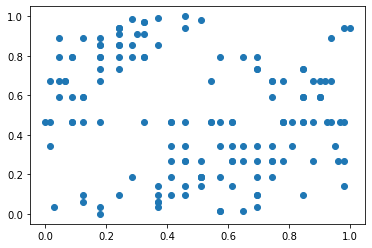

In [5]:
from sklearn.preprocessing import QuantileTransformer
scaled_X = QuantileTransformer().fit_transform(iris_X)  # transformation method
ax = plt.scatter(scaled_X[:, 0], scaled_X[:, 1])
plt.show()

## Pipelines

The machine learning process can be organized in pipelines. A `pipeline` is an object that combines transformations and a final estimation. In a pipeline each step before the last must be a **transformer**. The last step must be an **estimator**. Both transformers and estimators can learn from the data. <u>The relevant model for machine learning is typically a whole pipeline, rather than a single estimator</u>.

Scikit-learn provides a pipeline constructor to piece together these steps and simplify the workflow code.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # initiate imputer for step 1
logreg = LogisticRegression()  # initiate logistic regression for step 2
steps = [('imputation', imp), ('logistic_regression', logreg)]  # list of name/estimator two-tuples
pipeline = Pipeline(steps)  # initiate pipeline

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)  # fit pipeline, not estimator, to the training set
y_pred = pipeline.predict(X_test)  # use pipeline, not estimator, for prediction

balanced_accuracy_score(y_pred, y_test)

1.0

## Tryouts